---
title: "Applied Data Analytics" 
subtitle: "Homework 1 --- Due: September 28, 2025, 10 p.m."
author: "2025729139 / 윤정현"
format:
  pdf:
    pdf-engine: xelatex
    mainfont: "AppleSDGothicNeo-Regular"
    sansfont: "AppleSDGothicNeo-Regular"
    monofont: "Menlo"
    include-in-header:
      text: |
        \usepackage{kotex}
---

## Problem 1 (25 points) -- AB Testing 


Perform (i) two-proportion z-test and (ii) Chi-square test to calculate the p-value for the difference between A and B. Then interpret the result using a standard significance level (alpha) of 0.05.

| Variant        | Sessions | Conversions | Conversion Rate |
|----------------|----------|-------------|-----------------|
| A (Control)    | 4912     | 127         | 2.59%           |
| B (Treatment)  | 4866     | 78          | 1.60%           |

You should complete the following code:

In [1]:
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import chi2_contingency
import numpy as np
import pandas as pd
from math import sqrt

# 값 할당
sessions_A, conv_A = 4912, 127
sessions_B, conv_B = 4866, 78

# 데이터프레임 생성
data_df = pd.DataFrame({
    "Variant": ["A (Control)", "B (Treatment)"],
    "Sessions": [sessions_A, sessions_B],
    "Conversions": [conv_A, conv_B],
    "Conversion Rate (%)": [100*conv_A/sessions_A, 100*conv_B/sessions_B]
})
print(data_df.round(4))
print("--------------------------------")
## perform z-test and Chi-square tests
print("z-test result:")
# z-test
# H0: p_A == p_B  vs  H1: p_A != p_B
count = np.array([conv_A, conv_B])
nobs  = np.array([sessions_A, sessions_B])
z_stat, pval_ztest = proportions_ztest(count, nobs, alternative="two-sided")

# 95% CI for difference (p_A - p_B) using Wald (unpooled) approximation
pA = conv_A / sessions_A
pB = conv_B / sessions_B
diff = pA - pB
z_975 = 1.959963984540054  # ~97.5th percentile for two-sided 95% CI
se_diff = sqrt(pA*(1-pA)/sessions_A + pB*(1-pB)/sessions_B)
ci_low = diff - z_975 * se_diff
ci_high = diff + z_975 * se_diff

ztest_df = pd.DataFrame({
    "Metric": ["Z statistic", "p-value (two-sided)", "p_A", "p_B", 
               "Diff (p_A - p_B)", "95% CI Low", "95% CI High"],
    "Value": [z_stat, pval_ztest, pA, pB, diff, ci_low, ci_high]
})
print(ztest_df)
print("--------------------------------")
print("Chi-square test result:")
contingency = np.array([
    [conv_A, sessions_A - conv_A],
    [conv_B, sessions_B - conv_B]
])

chi2_stat, pval_chi2, dof, expected = chi2_contingency(contingency, 
                                                          correction=False)

contingency_df = pd.DataFrame(contingency, 
                              index=["A (Control)", "B (Treatment)"], 
                              columns=["Conversion=Yes", "Conversion=No"])
expected_df = pd.DataFrame(expected, 
                           index=["A (Control)", "B (Treatment)"], 
                           columns=["Expected Yes", "Expected No"])

contingency_df, expected_df.round(2), pd.DataFrame({
    "Metric": ["Chi-square statistic", "Degrees of freedom", 
               "p-value (two-sided)"],
    "Value": [chi2_stat, dof, pval_chi2]
})

print("--------------------------------")
alpha = 0.05
z_result = 'H0 기각 (비율이 다름)' if pval_ztest < alpha else 'H0 기각 실패'
chi2_result = 'H0 기각 (연관성 있음)' if pval_chi2 < alpha else 'H0 기각 실패'

print(f"두 표본 비율 z-검정 p-값 = {pval_ztest:.6f} -> {z_result}")
print(f"카이제곱 검정 p-값 = {pval_chi2:.6f} -> {chi2_result}")

print()
print(f"추정된 전환율: p_A = {pA:.4%}, p_B = {pB:.4%}")
print(f"추정된 차이 (A - B): {diff:.4%}")
print(f"95% 신뢰구간: [{ci_low:.4%}, {ci_high:.4%}]")
print("--------------------------------")

         Variant  Sessions  Conversions  Conversion Rate (%)
0    A (Control)      4912          127               2.5855
1  B (Treatment)      4866           78               1.6030
--------------------------------
z-test result:
                Metric     Value
0          Z statistic  3.390721
1  p-value (two-sided)  0.000697
2                  p_A  0.025855
3                  p_B  0.016030
4     Diff (p_A - p_B)  0.009825
5           95% CI Low  0.004155
6          95% CI High  0.015495
--------------------------------
Chi-square test result:
--------------------------------
두 표본 비율 z-검정 p-값 = 0.000697 -> H0 기각 (비율이 다름)
카이제곱 검정 p-값 = 0.000697 -> H0 기각 (연관성 있음)

추정된 전환율: p_A = 2.5855%, p_B = 1.6030%
추정된 차이 (A - B): 0.9825%
95% 신뢰구간: [0.4155%, 1.5495%]
--------------------------------


## Problem 2 (25 points) -- Coin Toss Simulation 

Simulate flipping a fair coin where "heads = 1" and "tails = 0." Take random samples of size `n = 5, 10, 100`, compute their means, and repeat this 1000 thousands. Display how the distribution of sample means approaches a normal distribution as `n` grows.

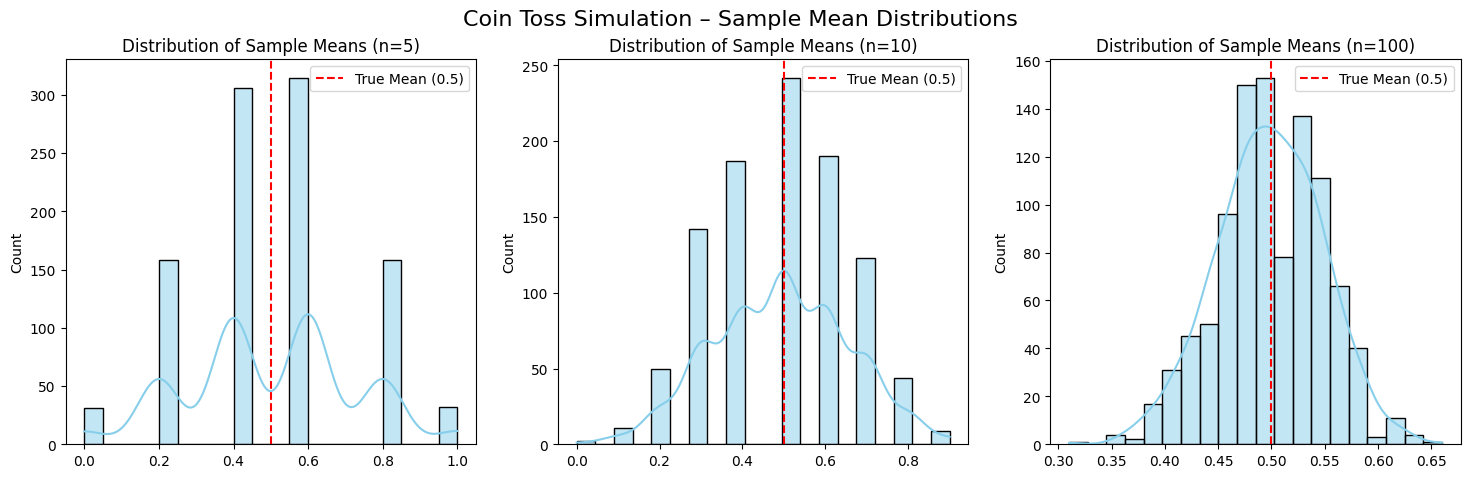

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def simulate_coin_toss_means(n, trials=1000):
    """Simulate sample means for fair coin toss."""
    means = []
    for _ in range(trials):
        sample = np.random.choice([0,1], size=n, p=[0.5,0.5])
        means.append(sample.mean())
    return np.array(means)

sample_sizes = [5, 10, 100]
results = {n: simulate_coin_toss_means(n, trials=1000) 
           for n in sample_sizes}

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, n in zip(axes, sample_sizes):
    sns.histplot(results[n], bins=20, kde=True, ax=ax, 
                 color="skyblue")
    ax.set_title(f"Distribution of Sample Means (n={n})")
    ax.axvline(0.5, color="red", linestyle="--", 
               label="True Mean (0.5)")
    ax.legend()

plt.suptitle("Coin Toss Simulation – Sample Mean Distributions", 
             fontsize=16)
plt.show()

## Problem 3 (25 points) -- Function Minimization 

Consider the function
$$
f(x) = x^4 - 4x
$$

/var/folders/64/j1qxrtwx5bn15w_qx0g25cf80000gp/T/ipykernel_48342/1317086677.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


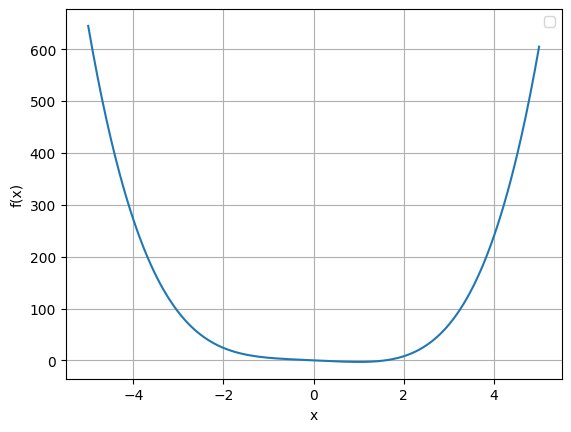

In [3]:
#| echo: FALSE
#| warning: FALSE
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**4 - 4*x

x = np.linspace(-5, 5, 400)
y = f(x)

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

(a) Use `scipy.optimize.minimize` or `scipy.optimize.minimize_scalar` to find a local minimum of  $f(x)$. 

In [4]:
from scipy.optimize import minimize_scalar
res = minimize_scalar(f, bounds=(-5, 5), method="bounded")
print("SciPy 결과:")
print("  최소점 x* =", res.x)
print("  최소값 f(x*) =", res.fun)

SciPy 결과:
  최소점 x* = 1.0000007153088344
  최소값 f(x*) = -2.99999999999693


(b) Apply the Newton-Raphson method to minimize $f(x)$. 

In [5]:
# 1차 미분 (gradient)
def df(x):
    return 4*x**3 - 4

# 2차 미분 (Hessian)
def d2f(x):
    return 12*x**2

def newton_minimize(x0, max_iter=50, tol=1e-10):
    x = float(x0)
    history = [x]
    for i in range(max_iter):
        g = df(x)
        h = d2f(x)
        if abs(g) < tol:
            break
        if h == 0:
            break
        x_new = x - g / h
        history.append(x_new)
        if abs(x_new - x) < tol:
            break
        x = x_new
    return x, f(x), history

초기값들 = [0.1, 0.5, 2.0, -1.0, 5.0]
for x0 in 초기값들:
    xm, fm, hist = newton_minimize(x0)
    print(f"초기값 {x0} → 최소점 x*={xm:.6f}, 최소값 f(x*)={fm:.6f}, 반복횟수={len(hist)-1}")

초기값 0.1 → 최소점 x*=1.000000, 최소값 f(x*)=-3.000000, 반복횟수=14
초기값 0.5 → 최소점 x*=1.000000, 최소값 f(x*)=-3.000000, 반복횟수=6
초기값 2.0 → 최소점 x*=1.000000, 최소값 f(x*)=-3.000000, 반복횟수=6
초기값 -1.0 → 최소점 x*=1.000000, 최소값 f(x*)=-3.000000, 반복횟수=9
초기값 5.0 → 최소점 x*=1.000000, 최소값 f(x*)=-3.000000, 반복횟수=8


(c) Apply the gradient descent method to minimize $f(x)$.

In [6]:
def gradient_descent(x0, lr=0.05, max_iter=2000, tol=1e-10):
    x = float(x0)
    history = [x]
    for i in range(max_iter):
        g = df(x)
        if abs(g) < tol:
            break
        x_new = x - lr * g
        history.append(x_new)
        if abs(x_new - x) < tol:
            break
        x = x_new
    return x, f(x), history

초기값들 = [-2.0, -0.5, 0.5, 2.0, 5.0]
for x0 in 초기값들:
    xm, fm, hist = gradient_descent(x0, lr=0.01)
    print(f"초기값 {x0} → 최소점 x*={xm:.6f}, 최소값 f(x*)={fm:.6f}, 반복횟수={len(hist)-1}")

초기값 -2.0 → 최소점 x*=1.000000, 최소값 f(x*)=-3.000000, 반복횟수=204
초기값 -0.5 → 최소점 x*=1.000000, 최소값 f(x*)=-3.000000, 반복횟수=190
초기값 0.5 → 최소점 x*=1.000000, 최소값 f(x*)=-3.000000, 반복횟수=165
초기값 2.0 → 최소점 x*=1.000000, 최소값 f(x*)=-3.000000, 반복횟수=158
초기값 5.0 → 최소점 x*=1.000000, 최소값 f(x*)=-3.000000, 반복횟수=178
